In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.chdir('/Users/crystal.butler/Documents/Code_Projects/MiFace/Python/data/Distance_Output/MiFace_2.1-0003/')
os.getcwd()


'/Users/crystal.butler/Documents/Code_Projects/MiFace/Python/data/Distance_Output/MiFace_2.1-0003'

In [3]:
# Read in all-pairs similarity scores.
pairs_scores = pd.read_csv('Score_Lists/0003.pairs.txt_scores.txt', header=None)
# Read in the list of scored words.
labels = pd.read_csv('Label_Lists/0003.pairs.txt_labels.txt', header=None)

In [4]:
print(type(pairs_scores))
print(type(labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
pairs_scores.head()

,0
0,0.329435
1,0.264609
2,0.253338
3,0.158340
4,0.100460


In [7]:
labels.head()

,0
0,serious
1,emotional
2,apprehensive
3,pensive
4,indifferent


In [8]:
# Transform similarity (proximity) scores to distances.
pairs_distances = 1 - pairs_scores
pairs_distances.head()

,0
0,0.670565
1,0.735391
2,0.746662
3,0.841660
4,0.899540


In [9]:
# print(pairs_distances[0][:])
for distance in pairs_distances:
    if distance < 0:
        print(distance)

In [10]:
# Create the distance array.
distances_array = np.array(pairs_distances[0][:])
labels_array = np.array(labels[0][:])
sizeof_da = distances_array.shape
print(sizeof_da)
print(len(sizeof_da))
sizeof_la = labels_array.shape
print(sizeof_la)
print(len(sizeof_la))

(780,)
1
(40,)
1


In [11]:
print(type(distances_array))
print(distances_array.shape)
print(type(labels_array))
print(labels_array.shape)

<class 'numpy.ndarray'>
(780,)
<class 'numpy.ndarray'>
(40,)


In [13]:
# Create the linkage matrix Z.
lnk = sch.linkage(distances_array, 'average')
print(lnk.shape)

# Fix distances that have become less than 0 due to floating point errors.
for i in range(len(lnk)):
    if lnk[i][2] < 0:
        lnk[i][2] = 0
# print(lnk)

(39, 4)


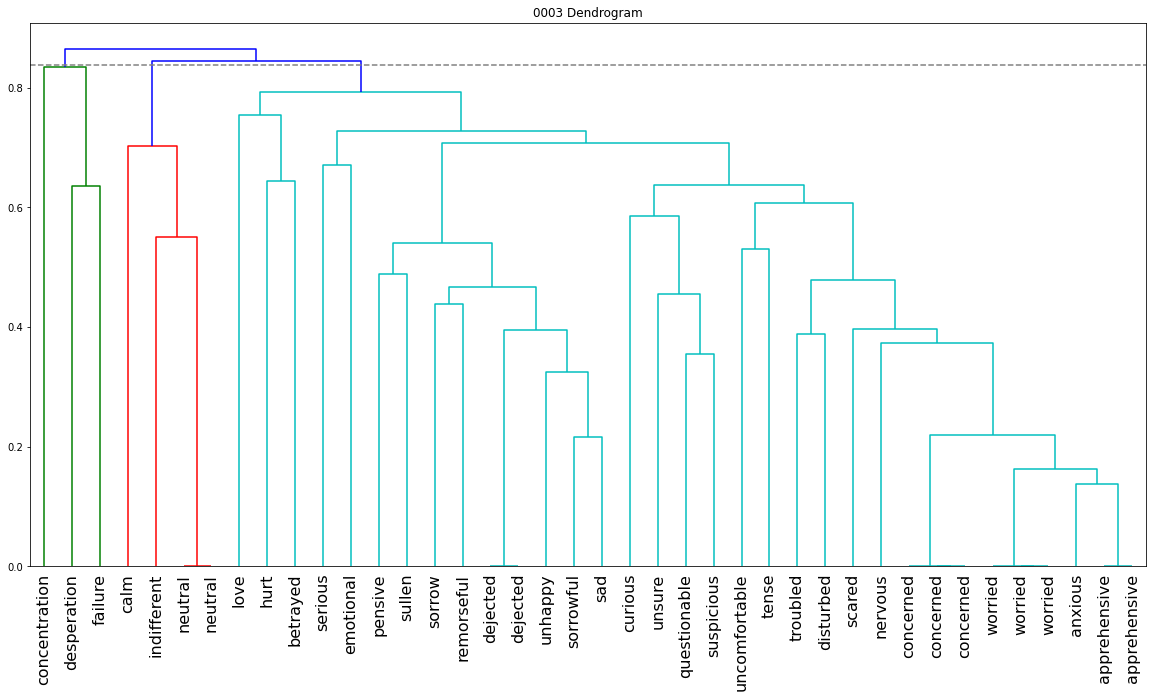

In [51]:
plt.figure(figsize=(20, 10))
plt.title("0003 Dendrogram")
plt.axhline(y=0.8375, color="grey", linestyle="--")
dend = sch.dendrogram(lnk, labels=labels_array, color_threshold=0.8375, leaf_font_size=16, leaf_rotation=90, count_sort='ascending')
# plt.plot([1,2,3], [0.8375, 0.8375, 0.8375])
plt.show()

In [34]:
len(dend['color_list'])

39

In [58]:
clusters = sch.fcluster(lnk, 0.8375, criterion='distance')
cluster_count = len(np.unique(clusters))
cluster_enumeration = np.unique(clusters)
print(type(clusters))
print(cluster_enumeration)
print(cluster_count)

<class 'numpy.ndarray'>
[1 2 3]
3


In [57]:
cophenetic_coefficient, cophenetic_list = sch.cophenet(lnk, distances_array)
print(cophenetic_coefficient)

0.8774072595122155


In [65]:
cluster_membership = {}
for value in cluster_enumeration:
    member_count = np.count_nonzero(clusters == value)
    cluster_membership[value] = member_count
for key in cluster_membership.keys():
    print(key, '\t', cluster_membership[key])

1 	 3
2 	 4
3 	 33
